In [1]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation,Conv2D, MaxPooling2D, BatchNormalization, SpatialDropout2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import tqdm

/anaconda3/envs/deep_learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/deep_learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/deep_learning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/deep_learning/lib/python3.7/site-packages/ten

In [2]:
K.clear_session() 

In [3]:
def process_for_mobilenet(file):
    #read the image into array
    #resize the array
    image = cv2.imread(file)
    #Interpolation is to not lose info on squishing
    image = cv2.resize(image, dsize=(224,224),interpolation=cv2.INTER_CUBIC)
    return image

In [4]:
#Import images Covid+
X = []
y = []
path = '/Users/iremn/PythonClass/Spiced/Personal_Projects/CoVid_Image/COVID-CT/Images-processed/CT_COVID/'
train_data = os.listdir(path)
for picture in tqdm.tqdm(train_data):
    image = process_for_mobilenet(path+picture)
    X.append(image)
    y.append(1)

100%|██████████| 349/349 [00:01<00:00, 207.41it/s]


In [5]:
#Import images Covid-
path = '/Users/iremn/PythonClass/Spiced/Personal_Projects/CoVid_Image/COVID-CT/Images-processed/CT_NonCOVID/'
train_data = os.listdir(path)
for picture in tqdm.tqdm(train_data):
    image = process_for_mobilenet(path+picture)
    X.append(image)
    y.append(0)

100%|██████████| 397/397 [00:01<00:00, 311.99it/s]


In [6]:
#Convert both to array
X = np.array(X)
y = np.array(y)

In [7]:
X.shape, y.shape

((746, 224, 224, 3), (746,))

In [8]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Normalize X
X_train = X_train/255
X_test = X_test/255

In [10]:
#Instantiate the model
K.clear_session() 
model = Sequential ([
    Conv2D(filters= 56, kernel_size = (3,3), strides = (1,1), padding = 'same',
          input_shape = (224, 224, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size = (2,2), strides=(2,2)),
    BatchNormalization(),
    #SpatialDropout2D(rate = 0.2),
    Flatten(),
    Dense(1),
    Activation('sigmoid')   
]



)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
#Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
covid_fit = model.fit(X_train, y_train, batch_size=10, epochs =35, validation_split = 0.3) #batch size for taking how many datapoint

Train on 417 samples, validate on 179 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/35
417/417 [==============================] - 30s 71ms/sample - loss: 5.7729 - acc: 0.6187 - val_loss: 7.2697 - val_acc: 0.5084
Epoch 2/35
417/417 [==============================] - 29s 70ms/sample - loss: 5.4096 - acc: 0.6475 - val_loss: 5.0367 - val_acc: 0.6145
Epoch 3/35
417/417 [==============================] - 29s 69ms/sample - loss: 5.5713 - acc: 0.6427 - val_loss: 4.1545 - val_acc: 0.6704
Epoch 4/35
417/417 [==============================] - 29s 70ms/sample - loss: 4.9539 - acc: 0.6787 - val_loss: 7.8170 - val_acc: 0.5084
Epoch 5/35
417/417 [==============================] - 28s 68ms/sample - loss: 5.5734 - acc: 0.6451 - val_loss: 5.8165 - val_acc: 0.6089
Epoch 6/35
417/417 [==============================] - 29s 70ms/sample - loss: 4.8952 - acc: 0.6906 - val_loss: 4.9653 - val_acc: 0.6648
Epoch 7/35
417/417 [==============================] - 29s 70ms/sample - loss: 5.4076 - acc

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


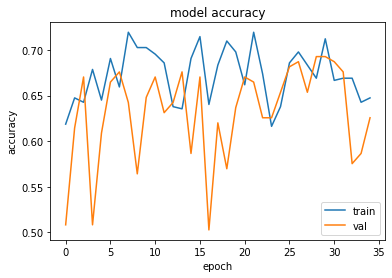

In [14]:
print(covid_fit.history.keys())
# summarize history for accuracy
plt.plot(covid_fit.history['acc'])
plt.plot(covid_fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()


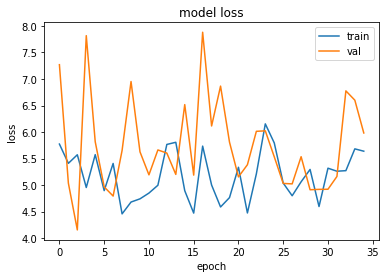

In [15]:
# summarize history for loss
plt.plot(covid_fit.history['loss'])
plt.plot(covid_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()